In [ ]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
data = pd.read_excel('MMM.xlsx')

In [ ]:
# Let's preview the data
print data.describe()
print data.columns

         Brand ID         Year     Absolut  Aristocrat      Barton  \
count  263.000000   263.000000  263.000000  263.000000  263.000000   
mean    12.596958  2001.695817    0.049430    0.049430    0.049430   
std      7.654584     3.639093    0.217177    0.217177    0.217177   
min      1.000000  1995.000000    0.000000    0.000000    0.000000   
25%      6.000000  1999.000000    0.000000    0.000000    0.000000   
50%     12.000000  2002.000000    0.000000    0.000000    0.000000   
75%     18.000000  2005.000000    0.000000    0.000000    0.000000   
max     31.000000  2007.000000    1.000000    1.000000    1.000000   

        Belvedere     Burnett      Chopin  Crystal Palac   Finlandia  \
count  263.000000  263.000000  263.000000     263.000000  263.000000   
mean     0.026616    0.041825    0.026616       0.049430    0.049430   
std      0.161265    0.200571    0.161265       0.217177    0.217177   
min      0.000000    0.000000    0.000000       0.000000    0.000000   
25%      

We can infer that there are a lot of columns consisting of sales ,different modes of advertising and some other variables that are not presently of our interest.

In [ ]:
print data['BrandName'].unique()
print '\n'
print 'Total Number of brands',len(data['BrandName'].unique())

[u'Absolut' u'Aristocrat' u'Barton' u'Belvedere' u'Burnett' u'Chopin'
 u'Crystal Palac' u'Finlandia' u"Fleischmann's" u'Fris' u"Gilbey's"
 u"Gordon's" u'Grey Goose' u'Kamchatka' u'Ketel One' u'Level' u'McCormick'
 u'Polar Ice' u'Popov' u'Pravda' u"Seagram's" u'Skol' u'Sky' u'Smirnoff'
 u'Stolicnaya' u'Tanqueray' u'Three Olives']


Total Number of brands 27


> This data set includes a total of 27 brands of vodka manufacturing companies. For MMM, let's choose a brand and analyse the impact of Price on sales.
  For instance, let's choose 'Absolut' as the brand for our analysis.

In [ ]:
Absolut = data[data['BrandName'] == 'Absolut']
Absolut

,BrandName,Brand ID,Year,Absolut,Aristocrat,Barton,Belvedere,Burnett,Chopin,Crystal Palac,...,LagTotalMinusSales,TierSales,OutsideTierSales,LagTierSales,LagOutsideTierSales,Firstintro,Marketshare,LagMktshare,YearID,total ad
0,Absolut,15,1995,1,0,0,0,0,0,0,...,60903,1080,59760,1035,59868,0,0.133923,0.124241,3,52343.9
1,Absolut,15,1996,1,0,0,0,0,0,0,...,60840,1255,59277,1080,59760,0,0.142007,0.133923,4,52297.2
2,Absolut,15,1997,1,0,0,0,0,0,0,...,60532,1532,58932,1255,59277,0,0.146758,0.142007,5,54947.9
3,Absolut,15,1998,1,0,0,0,0,0,0,...,60464,1730,58576,1532,58932,0,0.146106,0.146758,6,57432.7
4,Absolut,15,1999,1,0,0,0,0,0,0,...,60306,2118,57800,1730,58576,0,0.161284,0.146106,7,63213.9
5,Absolut,15,2000,1,0,0,0,0,0,0,...,59918,2549,56846,2118,57800,0,0.173368,0.161284,8,70489.2
6,Absolut,15,2001,1,0,0,0,0,0,0,...,59395,3358,56295,2549,56846,0,0.157546,0.173368,9,59715.4
7,Absolut,15,2002,1,0,0,0,0,0,0,...,59653,4197,55392,3358,56295,0,0.150425,0.157546,10,62148.3
8,Absolut,15,2003,1,0,0,0,0,0,0,...,59589,4939,54669,4197,55392,0,0.139245,0.150425,11,63602.1
9,Absolut,15,2004,1,0,0,0,0,0,0,...,59608,5582,53906,4939,54669,0,0.134353,0.139245,12,66816.3


There are a lot of columns not of our interest. Let's filter them out.

In [ ]:
Pr_Absolut = Absolut[['LnSales','LnPrice']]

In [ ]:
Pr_Absolut

,LnSales,LnPrice
0,8.006368,4.765132
1,8.113726,4.707727
2,8.143227,4.707727
3,8.196988,4.750396
4,8.306472,4.750397
5,8.434898,4.800839
6,8.384576,4.844937
7,8.406261,4.888373
8,8.409163,4.928312
9,8.442470,4.955827


> In order to find the impact of Price on sales,let's build a regression model on the dataset.
  First let's plot some graphs to understand the data points

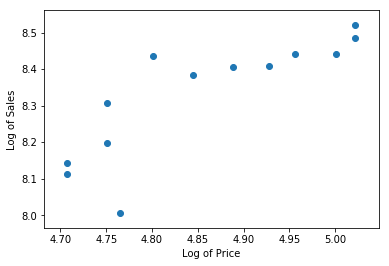

In [ ]:
plt.scatter(Pr_Absolut['LnPrice'],Pr_Absolut['LnSales'])
plt.xlabel('Log of Price')
plt.ylabel('Log of Sales')
plt.show()

> We can infer that price variation is almost linear in nature with sales.

In [ ]:
import statsmodels.formula.api as sm

In [ ]:
result = sm.ols(formula = 'LnSales ~ LnPrice',data = Pr_Absolut).fit()

In [ ]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     24.26
Date:                Sun, 04 Jun 2017   Prob (F-statistic):           0.000453
Time:                        14:19:16   Log-Likelihood:                 13.282
No. Observations:                  13   AIC:                            -22.56
Df Residuals:                      11   BIC:                            -21.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.8367      1.116      2.543      0.027         0.381     5.292
LnPrice        1.1310      0.230      4.926      0.000         0.626     1.636
==============================================================================
Omnibus:                        4.580   Durbin-Watson:                   0.653
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                1.653
Skew:                          -0.553   Prob(JB):                        0.438
Kurtosis:                       4.352   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Here, the p-value of the price is zero that indicates that price is significant indicator of sales.

Here, the value of R-squared is 0.688 i.e the price variable indicates nearly 69% of the data points.
The co-efficient of price tells that for every unit increase in price, there is 1.13 times increase in sales.

Let's add more variables to the regression and see what happens with the R-squared.

##### Now let's try with the advertising and price column.

In [ ]:
Ad_Absolut = Absolut[['LnSales','LnMag','LnNews','LnOut','LnBroad','LnPrint','LnPrice']]

In [ ]:
result_ad = sm.ols('LnSales ~ LnMag + LnNews + LnOut + LnBroad + LnPrint + LnPrice',data=Ad_Absolut).fit()

In [ ]:
result_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     13.96
Date:                Sun, 04 Jun 2017   Prob (F-statistic):            0.00270
Time:                        14:28:55   Log-Likelihood:                 23.293
No. Observations:                  13   AIC:                            -32.59
Df Residuals:                       6   BIC:                            -28.63
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.6613      1.697      0.979      0.365        -2.491     5.814
LnMag          0.0891      0.062      1.438      0.200        -0.062     0.241
LnNews         0.0131      0.012      1.132      0.301        -0.015     0.042
LnOut         -0.1219      0.106     -1.152      0.293        -0.381     0.137
LnBroad        0.0328      0.023      1.413      0.207        -0.024     0.090
LnPrint        0.1101      0.081      1.366      0.221        -0.087     0.307
LnPrice        1.0968      0.253      4.332      0.005         0.477     1.716
==============================================================================
Omnibus:                        0.747   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.610
Skew:                           0.043   Prob(JB):                        0.737
Kurtosis:                       1.942   Cond. No.                     1.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared value has increased!.The model is able to explain 87% of the data points. But here the p-values of some variables are high which can be accounted due to interaction effect and some other factors.

Let's try out the interation effect method between variables broad and print

In [ ]:
result_inter = sm.ols('LnSales ~ LnMag + LnNews + LnOut + LnBroad * LnPrint + LnPrice',data=Ad_Absolut).fit()

In [ ]:
result_inter.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LnSales   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     24.84
Date:                Sun, 04 Jun 2017   Prob (F-statistic):            0.00135
Time:                        14:54:03   Log-Likelihood:                 28.963
No. Observations:                  13   AIC:                            -41.93
Df Residuals:                       5   BIC:                            -37.41
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -8.2128      3.931     -2.089      0.091       -18.317     1.892
LnMag              -0.0110      0.058     -0.190      0.857        -0.160     0.138
LnNews             -0.0056      0.011     -0.515      0.628        -0.034     0.022
LnOut               0.0426      0.097      0.437      0.680        -0.208     0.293
LnBroad             1.6251      0.604      2.692      0.043         0.073     3.177
LnPrint             1.2719      0.444      2.864      0.035         0.130     2.413
LnBroad:LnPrint    -0.1586      0.060     -2.638      0.046        -0.313    -0.004
LnPrice             0.6901      0.236      2.919      0.033         0.082     1.298
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.615
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                0.165
Skew:                          -0.211   Prob(JB):                        0.921
Kurtosis:                       3.355   Cond. No.                     1.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results here are surprised!!. The presence of significant interaction indicates that the effect of one predictor variable on the response variable is different at different values of the other predictor variable.
    Therefore,the individial effects of the predictors also include the effects of the co-efficients of the interaction terms.
    The R-squared value has also increased indicating the model can explain most of the data points now.